In [2]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from playsound import playsound
from scipy.io.wavfile import write

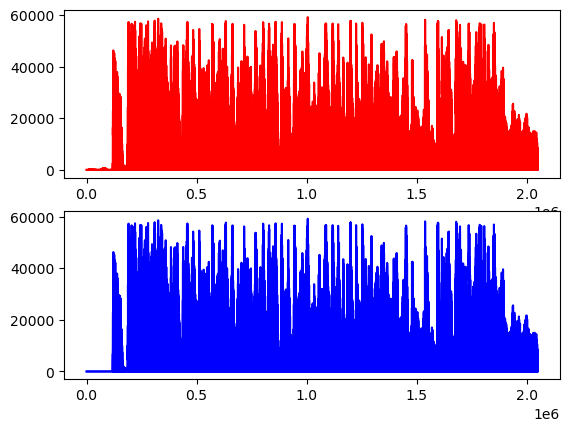

In [3]:
# Read the audio file
fs, y = wavfile.read('tlam2.wav')

fig,axs=plt.subplots(2,1)

L = len(y)
Y = fft(y)
plt.sca(axs[0])
plt.plot(np.abs(Y), 'r')

# Play the original audio
M = np.max(np.abs(Y))
thresh = 0.02
Ythresh = (np.abs(Y) > thresh * M) * Y
#nonzero_ratio = np.sum(np.abs(Ythresh) > 0) / L

ythresh = np.real(ifft(Ythresh))
plt.sca(axs[1])
plt.plot(np.abs(Ythresh), 'b')

plt.show()

# Scale the thresholded audio signal to the appropriate data type for writing
ythresh_scaled = np.int16(ythresh / np.max(np.abs(ythresh)) * 32767)

# Write the thresholded audio signal to a new WAV file
write('thresholded_noise.wav', 55000, ythresh_scaled)

In [ ]:
# Play the thresholded audio using playsound or any other appropriate library
playsound('thresholded_noise.wav')